Synthetic data, one warehouse lost demand

In [1]:
%load_ext autoreload
%autoreload 2

import analysis.ray_results_interpreter as rri
from importlib import reload
import pandas as pd

from ray.tune import ExperimentAnalysis
import pandas as pd
import matplotlib.pyplot as plt

def merge_experiment_results(paths):
    dataframes = []
    for path in paths:
        analysis = ExperimentAnalysis(path)
        dataframes.append(analysis.dataframe())
    
    # Merge all dataframes
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    # Reorder columns
    columns_order = ['time_this_iter_s', 'time_total_s', 'iterations_since_restore']
    other_columns = [col for col in merged_df.columns if col not in columns_order]
    merged_df = merged_df[columns_order + other_columns]
    
    # Print the merged dataframe
    print(merged_df.to_string(index=False))
    
    # Calculate and print average time_total_s
    avg_time_total = merged_df['time_total_s'].mean()
    print(f"\nAverage time_total_s: {avg_time_total:.2f} seconds")
    # Calculate and print average time_total_s
    avg_time_total = merged_df['iterations_since_restore'].mean()
    print(f"\nAverage iterations_since_restore: {avg_time_total:.2f}")
    
    # Create scatter plot
    plt.figure(figsize=(5, 3))
    plt.scatter(merged_df.index, merged_df['iterations_since_restore'])
    plt.xlabel('Index')
    plt.ylabel('Iterations Since Restore')
    plt.title('Scatter Plot of Iterations Since Restore')
    plt.show()
    
    return merged_df

In [2]:
paths = {
    3: "/user/ml4723/Prj/NIC/ray_results/perf/ctx/3",
    10: "/user/ml4723/Prj/NIC/ray_results/perf/ctx/10",
    20: "/user/ml4723/Prj/NIC/ray_results/perf/ctx/20",
    50: "/user/ml4723/Prj/NIC/ray_results/perf/ctx/50"
}
results_interpretor = rri.RayResultsinterpreter()
conditions = {'context': [0, 1, 256]}
df_ctx = results_interpretor.make_table(paths, conditions)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

min_test_loss = df_ctx.groupby(['# of stores'])['Test Loss'].transform('min')
df_ctx_print = df_ctx.copy()
df_ctx_print['Test Gap %'] = ((df_ctx_print['Test Loss'] - min_test_loss) / min_test_loss) * 100
print(df_ctx_print.to_string(index=False))

 # of stores  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %
           3             0         0.0100    5.670470  5.657994   5.663223         90    0.951412
           3             1         0.0100    5.613812  5.608477   5.609850         90    0.000000
           3           256         0.0100    5.616237  5.611364   5.612627         90    0.049495
          10             0         0.0100    5.773343  5.808772   5.776743         90    0.985464
          10             1         0.0100    5.712263  5.755829   5.720371         42    0.000000
          10           256         0.0100    5.731197  5.761904   5.729029         42    0.151364
          20             0         0.0010    5.902905  5.892253   5.871639         90    0.916974
          20             1         0.0010    5.850531  5.839253   5.818287        120    0.000000
          20           256         0.0100    5.857646  5.844117   5.820630        118    0.040261
          50        

In [3]:
paths = {
    3: "/user/ml4723/Prj/NIC/ray_results/perf/GNN/3",
    10: "/user/ml4723/Prj/NIC/ray_results/perf/GNN/10",
    20: "/user/ml4723/Prj/NIC/ray_results/perf/GNN/20",
    50: "/user/ml4723/Prj/NIC/ray_results/perf/GNN/50"
}

results_interpretor = rri.RayResultsinterpreter()
conditions = {'for_all_networks': [1, 16, 64]}
df_gnn = results_interpretor.make_table(paths, conditions)
df_gnn.rename(columns={'for_all_networks': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

min_test_loss = df_gnn.groupby(['# of stores'])['Test Loss'].transform('min')
df_gnn_print = df_gnn.copy()
df_gnn_print['Test Gap %'] = ((df_gnn_print['Test Loss'] - min_test_loss) / min_test_loss) * 100
print("Architecture Class: GNN")
print(df_gnn_print.to_string(index=False))

Architecture Class: GNN
 # of stores  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  Test Gap %
           3             1         0.0100    5.614032  5.609062   5.610129    0.011686
           3            16         0.0100    5.618455  5.607520   5.609473    0.000000
           3            64         0.0010    5.613282  5.608445   5.609535    0.001103
          10             1         0.0100    5.777970  5.816457   5.784590    1.175626
          10            16         0.0100    5.708765  5.751087   5.717375    0.000000
          10            64         0.0100    5.710389  5.751652   5.717664    0.005067
          20             1         0.0010    5.939852  5.911295   5.890847    1.350903
          20            16         0.0100    5.841372  5.834482   5.812328    0.000000
          20            64         0.0100    5.843079  5.833272   5.812664    0.005784
          50             1         0.0001    7.469758  7.450507   9.589425   78.380294
          50       

In [4]:
paths = {
    3: "/user/ml4723/Prj/NIC/ray_results/perf/GNN_message_passing/3",
    10: "/user/ml4723/Prj/NIC/ray_results/perf/GNN_message_passing/10",
    20: "/user/ml4723/Prj/NIC/ray_results/perf/GNN_message_passing/20",
    50: "/user/ml4723/Prj/NIC/ray_results/perf/GNN_message_passing/50"
}
results_interpretor = rri.RayResultsinterpreter()
conditions = {'for_all_networks': [1, 16, 64]}
df_gnn_mp = results_interpretor.make_table(paths, conditions)
df_gnn_mp.rename(columns={'for_all_networks': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

min_test_loss = df_gnn_mp.groupby(['# of stores'])['Test Loss'].transform('min')
df_gnn_mp_print = df_gnn_mp.copy()
df_gnn_mp_print['Test Gap %'] = ((df_gnn_mp_print['Test Loss'] - min_test_loss) / min_test_loss) * 100
print("Architecture Class: GNN Message Passing")
print(df_gnn_mp_print.to_string(index=False))

Architecture Class: GNN Message Passing
 # of stores  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  Test Gap %
           3             1         0.0100    5.620989  5.612162   5.614612    0.107264
           3            16         0.0100    5.613380  5.608589   5.608596    0.000000
           3            64         0.0010    5.613815  5.608413   5.609913    0.023482
          10             1         0.0100    5.721958  5.761270   5.726167    0.151508
          10            16         0.0100    5.711121  5.752939   5.717505    0.000000
          10            64         0.0001    5.717989  5.757410   5.722908    0.094494
          20             1         0.0010    5.852099  5.842484   5.821487    0.000000
          20            16         0.0010    5.853936  5.845516   5.824511    0.051936
          20            64         0.0010    5.842828  5.844684   5.822395    0.015586
          50             1         0.0100    8.102721  8.089805  10.459843   95.248555
   

In [59]:
df_ctx.insert(1, 'Architecture Class', "Symmetry_Aware")
df_ctx = df_ctx.loc[df_ctx.groupby(['# of stores'])['Dev Loss'].idxmin()]

df_gnn.insert(1, 'Architecture Class', "GNN")
df_gnn = df_gnn.loc[df_gnn.groupby(['# of stores'])['Dev Loss'].idxmin()]

df_gnn_mp.insert(1, 'Architecture Class', "GNN Message Passing")
df_gnn_mp = df_gnn_mp.loc[df_gnn_mp.groupby(['# of stores'])['Dev Loss'].idxmin()]

In [60]:
vanilla = [
    {
                "# of stores": 3,
                "Architecture Class": "Vanilla",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": 5.610,
                "Dev Loss": 5.610,
                "Test Loss": 5.610,
            },
    {
                "# of stores": 10,
                "Architecture Class": "Vanilla",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": 5.720,
                "Dev Loss": 5.740,
                "Test Loss": 5.720,
            },
    {
                "# of stores": 20,
                "Architecture Class": "Vanilla",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": 5.850,
                "Dev Loss": 5.870,
                "Test Loss": 5.850,
            },
    {
                "# of stores": 50,
                "Architecture Class": "Vanilla",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": 5.410,
                "Dev Loss": 5.400,
                "Test Loss": 5.420,
            },
]
df_vanilla = pd.DataFrame(vanilla)

df = pd.concat([df_ctx, df_gnn, df_gnn_mp])
architecture_order = ['Symmetry_Aware', 'GNN', 'GNN Message Passing', 'Vanilla']
df['Architecture Class'] = pd.Categorical(df['Architecture Class'], categories=architecture_order, ordered=True)
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.sort_values(by=['# of stores', 'Architecture Class'], inplace=True)
print(df.to_string(index=False))

 # of stores  Architecture Class context size  Learning Rate  Train Loss  Dev Loss  Test Loss  Test Gap %
           3      Symmetry_Aware            1         0.0100    5.613812  5.608477   5.609850    0.006726
           3                 GNN           16         0.0100    5.618455  5.607520   5.609473    0.000000
           3 GNN Message Passing           64         0.0010    5.613815  5.608413   5.609913    0.007838
           3             Vanilla         None            NaN    5.610000  5.610000   5.610000    0.009392
          10      Symmetry_Aware            1         0.0100    5.712263  5.755829   5.720371    0.052401
          10                 GNN           16         0.0100    5.708765  5.751087   5.717375    0.000000
          10 GNN Message Passing           16         0.0100    5.711121  5.752939   5.717505    0.002278
          10             Vanilla         None            NaN    5.720000  5.740000   5.720000    0.045917
          20      Symmetry_Aware            1 

Synthetic data, Transshipment

In [84]:
paths = {
    3: "/user/ml4723/Prj/NIC/ray_results/transshipment/3",
    5: "/user/ml4723/Prj/NIC/ray_results/transshipment/5",
    10: "/user/ml4723/Prj/NIC/ray_results/transshipment/10",
}
df_sym = make_the_result_table(paths, [0, 1, 256])
df_sym.insert(1, 'Architecture Class', "Symmetry_Aware")

paths = {
    3: "/user/ml4723/Prj/NIC/ray_results/transshipment/vanilla/3",
    5: "/user/ml4723/Prj/NIC/ray_results/transshipment/vanilla/5",
    10: "/user/ml4723/Prj/NIC/ray_results/transshipment/vanilla/10",
}
df_van = make_the_result_table(paths, [None])
df_van.insert(1, 'Architecture Class', "Vanilla")

lower_bound = [
    {
                "# of stores": 3,
                "Architecture Class": "Lower bound",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": None,
                "Dev Loss": None,
                "Test Loss": 6.19,
            },
    {
                "# of stores": 5,
                "Architecture Class": "Lower bound",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": None,
                "Dev Loss": None,
                "Test Loss": 5.75,
            },
    {
                "# of stores": 10,
                "Architecture Class": "Lower bound",
                "context size": None,
                "Learning Rate": None,
                "Train Loss": None,
                "Dev Loss": None,
                "Test Loss": 6.05,
            },
]
df_lower_bound = pd.DataFrame(lower_bound)

df = pd.concat([df_sym, df_van, df_lower_bound])
df.sort_values(by=['# of stores', 'context size'], inplace=True)
print(df.to_string(index=False))

 # of stores Architecture Class context size  Learning Rate  Train Loss  Dev Loss  Test Loss
           3     Symmetry_Aware            0         0.0100   15.786119 15.745235  38.493707
           3     Symmetry_Aware            1         0.0010    6.451584  6.442219   6.436544
           3     Symmetry_Aware          256         0.0100    6.215819  6.195688   6.190809
           3            Vanilla         None         0.0001    6.202121  6.195605   6.190790
           3        Lower bound         None            NaN         NaN       NaN   6.190000
           5     Symmetry_Aware            0         0.0010   14.106193 14.152811  34.056048
           5     Symmetry_Aware            1         0.0100    6.061970  6.045415   6.036085
           5     Symmetry_Aware          256         0.0010    5.751615  5.759176   5.751703
           5            Vanilla         None         0.0001    5.755991  5.759228   5.751869
           5        Lower bound         None            NaN         Na

One warehouse lost demand synthetic - different primitive setup

In [3]:
paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/ctx'
}

results_interpretor = rri.RayResultsinterpreter()
conditions = {'context': [0, 1, 16, 64], 'warehouse_holding_cost': [0.7, 1.0, 1.3, 2.0], 'warehouse_lead_time': [6], 'stores_correlation': [0.5]}
df = results_interpretor.make_table(paths, conditions)
df.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)
min_test_loss = df.groupby(['warehouse_holding_cost', 'warehouse_lead_time', 'stores_correlation'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.sort_values(by=['warehouse_holding_cost', 'warehouse_lead_time', 'stores_correlation', 'context size'], inplace=True)
print(df.to_string(index=False))

KeyError: 'warehouse_holding_cost'

In [14]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/ctx/3',
    10: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/ctx/10',
    20: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/ctx/20',
    50: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/ctx/50'
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/vanilla/3,
    10: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/vanilla/10',
    20: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/vanilla/20',
    50: '/user/ml4723/Prj/NIC/ray_results/diff_primitive/vanilla/50'
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']

shared_conditions = {'warehouse_holding_cost': [0.7], 'warehouse_lead_time': [2], 'stores_correlation': [0.5]}
# shared_conditions = {'warehouse_holding_cost': [0.7], 'warehouse_lead_time': [6], 'stores_correlation': [0.5]}
# shared_conditions = {'warehouse_holding_cost': [1.0], 'warehouse_lead_time': [2], 'stores_correlation': [0.5]}
# shared_conditions = {'warehouse_holding_cost': [1.0], 'warehouse_lead_time': [6], 'stores_correlation': [0.5]}

condition_for_ctx = shared_conditions.copy()
condition_for_ctx['context'] = [0, 1, 64]
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, condition_for_ctx, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, shared_conditions, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])
min_test_loss = df.groupby(['# of stores', 'warehouse_holding_cost', 'warehouse_lead_time', 'stores_correlation'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.drop(columns=['warehouse_holding_cost', 'warehouse_lead_time', 'stores_correlation'], inplace=True)
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(shared_conditions)
print(df.to_string(index=False))

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [4]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx/3',
    5: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx/5',
    20: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx/20',
    50: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx/50',
    100: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx/100'
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla/3',
    5: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla/5',
    20: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla/20',
    50: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla/50',
    100: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla/100'
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']

results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {}, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

# for 3, 9 from 512 512 512, 0.01, 0.001, 0.0001
# 10 from 512, 512, 512, 0.001, 0.0001
# 20 from 128, 128, 128, 0.01, 0.001


 # of stores Architecture Class  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  best_train_loss
           3     Symmatry_Aware           0.0         0.0100    5.678947  5.667238   5.658443          9    3.297811         5.665088
           3     Symmatry_Aware           1.0         0.0100    5.494950  5.499710   5.489791          9    0.218976         5.487189
           3     Symmatry_Aware          32.0         0.0010    5.475683  5.493100   5.478564          9    0.014024         5.472106
           3     Symmatry_Aware          64.0         0.0001    5.476005  5.493236   5.477796          9    0.000000         5.474725
           3            Vanilla           NaN         0.0010    5.485427  5.499762   5.493346         39    0.283868         5.472646
           5     Symmatry_Aware           0.0         0.0001    5.292834  5.278422   5.309792          9    3.538914         5.292628
           5     Symmatry_Aware           1.0         0.0010  

In [5]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx_large/3',
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla_large/3',
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {}, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

# for 3, 9 from 512 512 512, 0.01, 0.001, 0.0001
# 10 from 512, 512, 512, 0.001, 0.0001
# 20 from 128, 128, 128, 0.01, 0.001


 # of stores Architecture Class  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  best_train_loss
           3     Symmatry_Aware           0.0          0.001    5.677065  5.668593   5.659001          5    3.401764         5.670380
           3     Symmatry_Aware           1.0          0.010    5.484450  5.489308   5.473140          5    0.005710         5.484236
           3     Symmatry_Aware          64.0          0.001    5.480534  5.488657   5.472828          5    0.000000         5.477936
           3            Vanilla           NaN          0.001    5.481088  5.490378   5.477924         20    0.093108         5.473786


In [4]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx_lead/3',
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla_lead/3',
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {}, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

# for 3, 9 from 512 512 512, 0.01, 0.001, 0.0001
# 10 from 512, 512, 512, 0.001, 0.0001
# 20 from 128, 128, 128, 0.01, 0.001


 # of stores Architecture Class  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  best_train_loss
           3     Symmatry_Aware           0.0          0.010    5.924473  5.930560   5.910807          9    1.531933         5.907070
           3     Symmatry_Aware           1.0          0.010    5.834254  5.850992   5.821624          9    0.000000         5.823745
           3     Symmatry_Aware          64.0          0.010    5.836678  5.855047   5.828812          9    0.123483         5.809814
           3            Vanilla           NaN          0.001    5.836746  5.855643   5.823750         25    0.036534         5.796001


In [3]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/ctx_large_lead/3',
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/new_perf/vanilla_large_lead/3',
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {}, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

# for 3, 9 from 512 512 512, 0.01, 0.001, 0.0001
# 10 from 512, 512, 512, 0.001, 0.0001
# 20 from 128, 128, 128, 0.01, 0.001


 # of stores Architecture Class  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  best_train_loss
           3     Symmatry_Aware           0.0          0.010    5.939833  5.923935   5.904784          9    1.543459         5.921181
           3     Symmatry_Aware           1.0          0.010    5.845350  5.842640   5.815340          9    0.005311         5.841207
           3     Symmatry_Aware          64.0          0.010    5.837446  5.845638   5.815469          9    0.007529         5.836145
           3            Vanilla           NaN          0.001    5.847357  5.845670   5.815031         10    0.000000         5.836385


In [5]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/ctx/3',
    5: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/ctx/5',
    10: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/ctx/10',
    20: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/ctx/20',
    30: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/ctx/30',
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/ctx/50',
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/vanilla/3',
    5: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/vanilla/5',
    10: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/vanilla/10',
    20: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/vanilla/20',
    30: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/vanilla/30',
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench_2/vanilla/50',
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']
    #out_row['path'] = reference_row['path']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {}, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

 # of stores Architecture Class  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  best_train_loss
           3     Symmatry_Aware           0.0         0.0100    5.675806  5.682704   5.658879          9    3.390286         5.675806
           3     Symmatry_Aware           1.0         0.0010    5.491803  5.505829   5.486002          9    0.231741         5.491158
           3     Symmatry_Aware          64.0         0.0100    5.480100  5.494160   5.473318          9    0.000000         5.477202
           3            Vanilla           NaN         0.0001    5.499400  5.514017   5.495594         18    0.406996         5.497296
           5     Symmatry_Aware           0.0         0.0100    5.323914  5.288216   5.308000          8    3.562414         5.311582
           5     Symmatry_Aware           1.0         0.0100    5.136035  5.117595   5.142365          8    0.330776         5.136035
           5     Symmatry_Aware          64.0         0.0100  

In [25]:
ctx_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/ctx/3',
    5: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/ctx/5',
    10: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/ctx/10',
    20: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/ctx/20',
    30: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/ctx/30',
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/ctx/50',
}
vanilla_paths = {
    3: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/vanilla/3',
    5: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/vanilla/5',
    10: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/vanilla/10',
    20: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/vanilla/20',
    30: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/vanilla/30',
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench_large/vanilla/50',
}

def custom_data_filler(out_row, reference_row):
    out_row['best_train_loss'] = reference_row['best_train_loss']
    #out_row['path'] = reference_row['path']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size', 'learning_rate': 'Learning Rate'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {'master': [128, 512]}, custom_data_filler)
df_vanilla.rename(columns={'learning_rate': 'Learning Rate'}, inplace=True)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
df = pd.concat([df_ctx, df_vanilla])

# Move 'master size' column next to 'context size'
if 'master' in df.columns:
    context_size_index = df.columns.get_loc('context size')
    master_size = df.pop('master')
    df.insert(context_size_index + 1, 'master', master_size)

min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.sort_values(by=['# of stores', 'context size', 'master'], inplace=True)

print(df.to_string(index=False))

 # of stores Architecture Class  context size  master  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  best_train_loss
           3     Symmatry_Aware           0.0     NaN         0.0100    5.683916  5.678031   5.656816          6    3.417668         5.675867
           3     Symmatry_Aware           1.0     NaN         0.0100    5.499122  5.501344   5.483720          6    0.253140         5.499122
           3     Symmatry_Aware          64.0     NaN         0.0100    5.486093  5.492222   5.469874          5    0.000000         5.484408
           3            Vanilla           NaN   128.0         0.0010    5.514983  5.512265   5.494893          9    0.457391         5.509180
           3            Vanilla           NaN   512.0         0.0001    5.510871  5.513073   5.496092          9    0.479314         5.509043
           5     Symmatry_Aware           0.0     NaN         0.0010    5.328601  5.300120   5.317266          4    3.758691         5.326734
      

 time_this_iter_s  time_total_s  iterations_since_restore  dev_loss  train_loss  test_loss  timestamp checkpoint_dir_name  done  training_iteration    trial_id                date    pid      hostname        node_ip  time_since_restore  config/n_stores  config/learning_rate  config/context config/overriding_networks config/overriding_outputs  config/samples      logdir
       866.872476  54402.285268                        74  5.096229    5.098696   5.128291 1724960215                None False                  74 591b0_00006 2024-08-29_15-36-55 100169 researchgpu04 128.59.240.194        54402.285268                5                0.0010              32                  [context]                 [context]               1 591b0_00006
       422.219686 108697.749186                       400  5.110029    5.121015   5.145279 1725019678                None False                 400 591b0_00009 2024-08-30_08-07-58 124243 researchgpu04 128.59.240.194       108697.749186                5    

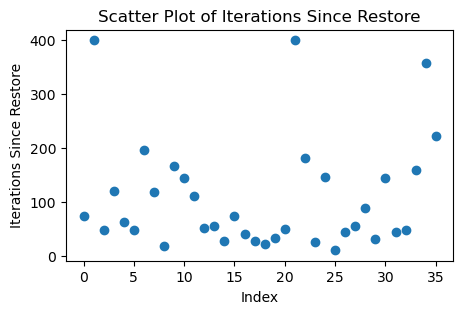

In [14]:
paths = [
    "/user/ml4723/Prj/NIC/ray_results/new_perf/ctx/5/run_2024-08-29_00-29-57/experiment_state-2024-08-29_00-29-58.json",
]
merged_results = merge_experiment_results(paths)

In [4]:
weekly_forecast_paths = {
    1: '/user/ml4723/Prj/NIC/ray_results/cons/weekly_forecast_NN',
}
data_driven_net_paths = {
    1: '/user/ml4723/Prj/NIC/ray_results/cons/data_driven_net',
}
fixed_quantile_paths = {
    1: '/user/ml4723/Prj/NIC/ray_results/cons/fixed_quantile',
}
quantile_nv_paths = {
    1: '/user/ml4723/Prj/NIC/ray_results/cons/quantile_nv',
}
just_in_time_paths = {
    1: '/user/ml4723/Prj/NIC/ray_results/cons/just_in_time',
}

#def custom_data_filler(out_row, reference_row):
#    out_row['path'] = reference_row['path']

results_interpretor = rri.RayResultsinterpreter()
df_weekly_forecast = results_interpretor.make_table(weekly_forecast_paths, {'store_underage_cost': [4, 6, 9, 13]})
df_data_driven_net = results_interpretor.make_table(data_driven_net_paths, {'store_underage_cost': [4, 6, 9, 13]})
df_fixed_quantile = results_interpretor.make_table(fixed_quantile_paths, {'store_underage_cost': [4, 6, 9, 13]})
df_quantile_nv = results_interpretor.make_table(quantile_nv_paths, {'store_underage_cost': [4, 6, 9, 13]})
df_just_in_time = results_interpretor.make_table(just_in_time_paths, {'store_underage_cost': [4, 6, 9, 13]})
df_weekly_forecast.insert(1, 'Architecture Class', "Weekly Forecast")
df_data_driven_net.insert(1, 'Architecture Class', "HDPO")
df_fixed_quantile.insert(1, 'Architecture Class', "Fixed Quantile")
df_quantile_nv.insert(1, 'Architecture Class', "Newsvendor")
df_just_in_time.insert(1, 'Architecture Class', "Oracle")

optimal_weeks = {
    4: 4.7298,
    6: 5.0385,
    9: 5.3489,
    13: 5.5832
}
df = pd.concat([df_weekly_forecast, df_data_driven_net, df_fixed_quantile, df_quantile_nv, df_just_in_time])

# Insert 'Optimal # of Weeks' next to 'Architecture Class' only for Weekly Forecast rows
architecture_class_index = df.columns.get_loc('Architecture Class')
df.insert(architecture_class_index + 1, 'Optimal # of Weeks', None)
df.loc[df['Architecture Class'] == 'Weekly Forecast', 'Optimal # of Weeks'] = df.loc[df['Architecture Class'] == 'Weekly Forecast', 'store_underage_cost'].map(optimal_weeks)

min_dev_loss = df.groupby(['store_underage_cost'])['Dev Loss'].transform('min')
df['Dev Gap %'] = -((df['Dev Loss'] - min_dev_loss) / min_dev_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Dev Gap %', df.pop('Dev Gap %'))
df.drop(columns=['# of stores', '# of runs'], inplace=True)
# Define the custom order for Architecture Class
architecture_order = ['Oracle', 'HDPO', 'Weekly Forecast', 'Fixed Quantile', 'Newsvendor']
# Create a categorical column with the custom order
df['Architecture Class'] = pd.Categorical(df['Architecture Class'], categories=architecture_order, ordered=True)
# Sort the dataframe
df.sort_values(by=['store_underage_cost', 'Architecture Class'], inplace=True)
# Move store_underage_cost to the first column
cols = df.columns.tolist()
cols.remove('store_underage_cost')
cols = ['store_underage_cost'] + cols
df = df[cols]

print(df.to_string(index=False))
df.to_csv('results.csv', index=False)
print("Results saved to comparison_results.csv")

 store_underage_cost Architecture Class Optimal # of Weeks  Train Loss    Dev Loss  Dev Gap %
                   4             Oracle               None -213.665006 -198.463167   0.000000
                   4               HDPO               None -161.395985 -150.136966  24.350211
                   4    Weekly Forecast             4.7298 -144.881375 -134.072153  32.444819
                   4     Fixed Quantile               None -150.145288 -139.585469  29.666814
                   4         Newsvendor               None -134.674537 -120.307394  39.380493
                   6             Oracle               None -320.510398 -297.704852   0.000000
                   6               HDPO               None -255.922236 -236.749878  20.474968
                   6    Weekly Forecast             5.0385 -238.705123 -220.377574  25.974477
                   6     Fixed Quantile               None -243.081326 -225.572379  24.229526
                   6         Newsvendor               None -

In [15]:
ctx_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/ctx/50',
    100: '/user/ml4723/Prj/NIC/ray_results/stable_bench/ctx/100',
}
gnn_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN/50',
    100: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN/100',
}
gnn_mp_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_message_passing/50',
    100: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_message_passing/100',
}
vanilla_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/vanilla/50',
    100: '/user/ml4723/Prj/NIC/ray_results/stable_bench/vanilla/100',
}

custom_stemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/custom_stemb/50',
}

def custom_data_filler(out_row, reference_row):
    pass
    # out_row['best_train_loss'] = reference_row['best_train_loss']
    #out_row['path'] = reference_row['path']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 2, 4, 8, 16, 32, 64], 'samples': [0, 1, 2, 3], 'learning_rate': [0.01, 0.001, 0.0001]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size'}, inplace=True)

df_gnn = results_interpretor.make_table(gnn_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64], 'samples': [0, 1, 2, 3], 'learning_rate': [0.01, 0.001, 0.0001]}, custom_data_filler)
df_gnn.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_mp = results_interpretor.make_table(gnn_mp_paths, {'context': [0, 1, 2, 4, 8, 16, 32, 64], 'samples': [0, 1, 2, 3], 'learning_rate': [0.01, 0.001, 0.0001]}, custom_data_filler)
df_gnn_mp.rename(columns={'context': 'context size'}, inplace=True)

df_custom_stemb = results_interpretor.make_table(custom_stemb_paths, {'samples': [0, 1, 2, 3], 'learning_rate': [0.01, 0.001, 0.0001]}, custom_data_filler)

df_vanilla = results_interpretor.make_table(vanilla_paths, {'master': [128, 512], 'samples': [0, 1, 2, 3], 'learning_rate': [0.01, 0.001, 0.0001]}, custom_data_filler)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_gnn.insert(1, 'Architecture Class', "GNN")
df_gnn_mp.insert(1, 'Architecture Class', "GNN_MP")
df_custom_stemb.insert(1, 'Architecture Class', "Custom_STEMB")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
# df = pd.concat([df_ctx, df_gnn, df_gnn_mp, df_custom_stemb, df_vanilla])
df = pd.concat([df_custom_stemb])

# Move 'master size' column next to 'context size'
if 'master' in df.columns:
    context_size_index = df.columns.get_loc('context size')
    master_size = df.pop('master')
    df.insert(context_size_index + 1, 'master', master_size)

min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
# df.sort_values(by=['# of stores', 'context size', 'master'], inplace=True)
df.sort_values(by=['# of stores'], inplace=True)

print(df.to_string(index=False))

 # of stores Architecture Class  samples  learning_rate  Learning Rate  Train Loss  Dev Loss  Test Loss  Test Gap %  # of runs
          50       Custom_STEMB        1         0.0001         0.0001    5.242221  5.220918   5.239397    0.000000          1
          50       Custom_STEMB        1         0.0010         0.0010    6.834170  6.810633   6.831540   30.387905          1
          50       Custom_STEMB        1         0.0100         0.0100  143.566516 20.207279  42.082591  703.195322          1
          50       Custom_STEMB        2         0.0001         0.0001   22.707228 22.743883  49.667637  847.964788          1
          50       Custom_STEMB        2         0.0010         0.0010   11.859266 11.655162  11.614227  121.671074          1
          50       Custom_STEMB        2         0.0100         0.0100    6.928086  6.918176   6.937865   32.417242          1
          50       Custom_STEMB        3         0.0001         0.0001    5.255091  5.234593   5.252496    0.25

In [17]:
ctx_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/ctx/50',
}
gnn_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN/50',
}
gnn_mpnn_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_MPNN/50',
}
gnn_attention_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_attention/50',
}
gnn_attention_stemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_attention_stemb/50',
}
gnn_mpnn_pna_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_MPNN_PNA/50',
}
gnn_pna_stemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_PNA_stemb/50',
}
gnn_mp_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_message_passing/50',
}
custom_stemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/custom_stemb/50',
}
custom_stemb_pna_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/custom_stemb_pna/50',
}
vanilla_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/vanilla/50',
}

def custom_data_filler(out_row, reference_row):
    pass
    # out_row['best_train_loss'] = reference_row['best_train_loss']
    #out_row['path'] = reference_row['path']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size'}, inplace=True)

df_gnn = results_interpretor.make_table(gnn_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_mpnn = results_interpretor.make_table(gnn_mpnn_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_mpnn.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_attention = results_interpretor.make_table(gnn_attention_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_attention.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_mpnn_pna = results_interpretor.make_table(gnn_mpnn_pna_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_mpnn_pna.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_pna_stemb = results_interpretor.make_table(gnn_pna_stemb_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_pna_stemb.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_mp = results_interpretor.make_table(gnn_mp_paths, {'context': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_mp.rename(columns={'context': 'context size'}, inplace=True)

df_custom_stemb = results_interpretor.make_table(custom_stemb_paths, {}, custom_data_filler)

df_custom_stemb_pna = results_interpretor.make_table(custom_stemb_pna_paths, {}, custom_data_filler)

# df_gnn_attention_stemb = results_interpretor.make_table(gnn_attention_stemb_paths, {'for_all_networks': [0, 1, 2, 4, 8, 16, 32, 64]}, custom_data_filler)
# df_gnn_attention_stemb.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_vanilla = results_interpretor.make_table(vanilla_paths, {'master': [128, 512]}, custom_data_filler)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_gnn.insert(1, 'Architecture Class', "GNN")
df_gnn_mpnn.insert(1, 'Architecture Class', "GNN_MPNN")
df_gnn_mp.insert(1, 'Architecture Class', "GNN_MP")
df_gnn_attention.insert(1, 'Architecture Class', "GNN_Attention")
df_gnn_mpnn_pna.insert(1, 'Architecture Class', "GNN_MPNN_PNA")
df_gnn_pna_stemb.insert(1, 'Architecture Class', "GNN_PNA_STEMB")
df_custom_stemb.insert(1, 'Architecture Class', "Custom_STEMB")
df_custom_stemb_pna.insert(1, 'Architecture Class', "Custom_STEMB_PNA")
# df_gnn_attention_stemb.insert(1, 'Architecture Class', "GNN_Attention_STEMB")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
# df = pd.concat([df_ctx, df_gnn, df_gnn_mp, df_gnn_attention, df_gnn_mpnn_pna, df_gnn_pna_stemb, df_gnn_attention_stemb, df_vanilla])
# df = pd.concat([df_ctx])
# df = pd.concat([df_ctx, df_vanilla, df_gnn_mp, df_custom_stemb])
df = pd.concat([df_custom_stemb, df_gnn_pna_stemb, df_custom_stemb_pna])

# Move 'master size' column next to 'context size'
if 'master' in df.columns:
    context_size_index = df.columns.get_loc('context size')
    master_size = df.pop('master')
    df.insert(context_size_index + 1, 'master', master_size)

#min_test_loss = df.groupby(['# of stores', 'context size'])['Test Loss'].transform('min')
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
# df.sort_values(by=['# of stores', 'context size', 'master'], inplace=True)
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

 # of stores Architecture Class  Learning Rate  Train Loss  Dev Loss  Test Loss  # of runs  Test Gap %  context size
          50      GNN_PNA_STEMB         0.0010    6.694859  6.672745   6.691896          9   28.233871           4.0
          50      GNN_PNA_STEMB         0.0010    5.227092  5.205777   5.223865          9    0.102632           8.0
          50      GNN_PNA_STEMB         0.0010    5.221111  5.200564   5.218509          9    0.000000          16.0
          50      GNN_PNA_STEMB         0.0001    5.229448  5.208968   5.226705          9    0.157051          32.0
          50      GNN_PNA_STEMB         0.0001    5.225919  5.206423   5.223806          9    0.101502          64.0
          50       Custom_STEMB         0.0001    5.242221  5.220918   5.239397          9    0.400265           NaN
          50   Custom_STEMB_PNA         0.0010    5.348265  5.326194   5.342982          4    2.385230           NaN


In [17]:
ctx_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/ctx/50',
}
gnn_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN/50',
}
gnn_wistemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_WISTEMB/50',
}
gnn_pna_wistemb_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_PNA_WISTEMB/50',
}
gnn_pna_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_PNA/50',
}
gnn_mp_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_message_passing/50',
}
gnn_noctx_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_NoCtx/50',
}
gnn_noctx_pna_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/GNN_NoCtx_PNA/50',
}
vanilla_paths = {
    50: '/user/ml4723/Prj/NIC/ray_results/stable_bench/vanilla/50',
}

def custom_data_filler(out_row, reference_row):
    pass
    # out_row['best_train_loss'] = reference_row['best_train_loss']
    #out_row['path'] = reference_row['path']
results_interpretor = rri.RayResultsinterpreter()
df_ctx = results_interpretor.make_table(ctx_paths, {'context': [4, 8, 16, 32, 64]}, custom_data_filler)
df_ctx.rename(columns={'context': 'context size'}, inplace=True)

df_gnn = results_interpretor.make_table(gnn_paths, {'for_all_networks': [4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_wistemb = results_interpretor.make_table(gnn_wistemb_paths, {'for_all_networks': [4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_wistemb.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_pna_wistemb = results_interpretor.make_table(gnn_pna_wistemb_paths, {'for_all_networks': [4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_pna_wistemb.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_pna = results_interpretor.make_table(gnn_pna_paths, {'for_all_networks': [4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_pna.rename(columns={'for_all_networks': 'context size'}, inplace=True)

df_gnn_mp = results_interpretor.make_table(gnn_mp_paths, {'context': [4, 8, 16, 32, 64]}, custom_data_filler)
df_gnn_mp.rename(columns={'context': 'context size'}, inplace=True)

df_gnn_noctx = results_interpretor.make_table(gnn_noctx_paths, {}, custom_data_filler)

df_gnn_noctx_pna = results_interpretor.make_table(gnn_noctx_pna_paths, {}, custom_data_filler)

df_vanilla = results_interpretor.make_table(vanilla_paths, {'master': [128, 512]}, custom_data_filler)

df_ctx.insert(1, 'Architecture Class', "Symmatry_Aware")
df_gnn.insert(1, 'Architecture Class', "GNN")
df_gnn_wistemb.insert(1, 'Architecture Class', "GNN_WISTEMB")
df_gnn_mp.insert(1, 'Architecture Class', "GNN_MP")
df_gnn_pna_wistemb.insert(1, 'Architecture Class', "GNN_PNA_WISTEMB")
df_gnn_pna.insert(1, 'Architecture Class', "GNN_PNA")
df_gnn_noctx.insert(1, 'Architecture Class', "GNN_NoCtx")
df_gnn_noctx_pna.insert(1, 'Architecture Class', "GNN_NoCtx_PNA")
df_vanilla.insert(1, 'Architecture Class', "Vanilla")
# df = pd.concat([df_ctx, df_gnn, df_gnn_mp, df_gnn_attention, df_gnn_mpnn_pna, df_gnn_pna_stemb, df_gnn_attention_stemb, df_vanilla])
# df = pd.concat([df_ctx])
df = pd.concat([df_gnn, df_gnn_noctx])

# Move 'master size' column next to 'context size'
if 'master' in df.columns:
    context_size_index = df.columns.get_loc('context size')
    master_size = df.pop('master')
    df.insert(context_size_index + 1, 'master', master_size)

#min_test_loss = df.groupby(['# of stores', 'context size'])['Test Loss'].transform('min')
min_test_loss = df.groupby(['# of stores'])['Test Loss'].transform('min')
df['Test Gap %(all)'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %(all)', df.pop('Test Gap %(all)'))
min_test_loss = df.groupby(['# of stores', 'context size'])['Test Loss'].transform('min')
df['Test Gap %(context)'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %(context)', df.pop('Test Gap %(context)'))
# df.sort_values(by=['# of stores', 'context size', 'master'], inplace=True)
df.sort_values(by=['# of stores', 'context size'], inplace=True)

print(df.to_string(index=False))

 # of stores Architecture Class  context size  Learning Rate  Train Loss  Dev Loss  Test Loss  Test Gap %(all)  Test Gap %(context)  # of runs
          50                GNN           4.0         0.0010    5.273201  5.248708   5.270007         0.732030                  0.0         17
          50                GNN           8.0         0.0001    5.241436  5.221542   5.239004         0.139422                  0.0         18
          50                GNN          16.0         0.0010    5.309022  5.285288   5.304163         1.384899                  0.0         18
          50                GNN          32.0         0.0010    5.255565  5.233220   5.251449         0.377304                  0.0         18
          50                GNN          64.0         0.0001    5.234232  5.213634   5.231709         0.000000                  0.0         18
          50   Custom_STEMB_PNA           NaN         0.0001    5.235613  5.215087   5.232830         0.021429                  NaN          9